In [5]:
#定义基本统计量函数

import numpy as np
import pandas as pd
from scipy import stats
#基本统计量
a1 = pd.Series(100*np.random.normal(size = 100))  #产生序列方式100个随机数
a2 = np.random.f(2,4,size = 100)          #从F(2，4)分布中抽取100个随机数
a3 = np.random.randint(1,100,size = 100)  #产生1到100的100个整数型随机数
def status(x) :
    return pd.Series([x.count(),x.min(),x.idxmin(),x.quantile(.25),x.median(),
x.quantile(.75),x.mean(),x.max(),x.idxmax(),x.mad(),x.var(),
                      x.std(),x.skew(),x.kurt()],index=['总数','最小值','最小值位置','25%分位数', '中位数','75%分位数','均值','最大值','最大值位数','平均绝对偏差','方差','标准差','偏度','峰度'])
df = pd.DataFrame(np.array([a1,a2,a3]).T, columns=['x1','x2','x3'])  #合并统一数据框
df.head()

,x1,x2,x3
0,92.219580,1.153835,94.0
1,59.667166,5.070983,3.0
2,90.817017,4.453994,20.0
3,-43.114969,0.149094,70.0
4,-66.270443,0.673171,73.0


In [6]:

df.apply(status) #调用基本统计量函数，将df值代入

,x1,x2,x3
总数,100.000000,100.000000,100.000000
最小值,-243.716764,0.069997,1.000000
最小值位置,84.000000,95.000000,28.000000
25%分位数,-60.382414,0.354561,19.000000
中位数,13.492324,0.920338,48.000000
75%分位数,97.362575,1.830966,74.250000
均值,15.828643,1.907831,47.880000
最大值,287.579941,12.779776,98.000000
最大值位数,20.000000,34.000000,17.000000
平均绝对偏差,88.884524,1.770587,27.622400


In [ ]:
1.伯努利分布

伯努利试验是单次随机试验，只有"成功（值为1）"或"失败（值为0）"这两种结果，是由瑞士科学家雅各布·伯努利(1654 -1705)提出来的。

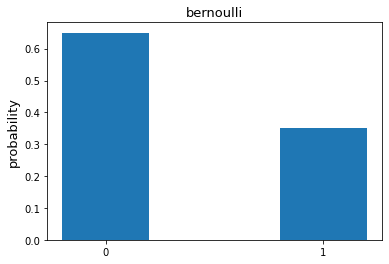

In [8]:
#定义伯努利函数
import matplotlib.pyplot as plt
def bernoulli_pmf(p=0.0):
    ber_dist = stats.bernoulli(p)
    x = [0, 1]
    x_name = ['0', '1']
    pmf = [ber_dist.pmf(x[0]), ber_dist.pmf(x[1])]
    plt.bar(x, pmf, width=0.4)
    plt.xticks(x, x_name)
    plt.ylabel(u'probability',fontsize=13)
    plt.title(u'bernoulli',fontsize=13,rotation=0)
    plt.show()
bernoulli_pmf(p=0.35) #生成（x=1,p=0.35)的伯努利概率质量函数

In [ ]:
2.二项分布

假设某个试验是伯努利试验，其成功概率用p表示，那么失败的概率为q=1-p。进行n次这样的试验，成功了x次，
则失败次数为n-x，发生这种情况的概率可用下面公式来计算：

In [24]:
"""二项分布，模拟抛硬币试验
p=stats.binom(n, p).pmf(m)
param n: 实验总次数
param p: 单次实验成功的概率
m: 试验成功的次数
"""
p1=stats.binom(100, 0.2).pmf(20) #试验100次发生20次概率

In [25]:
p1

0.09930021480881725

In [26]:
p=stats.binom(100, 0.2).cdf(20) #试验100次累计<=20次概率

In [27]:
p

0.5594615848733977

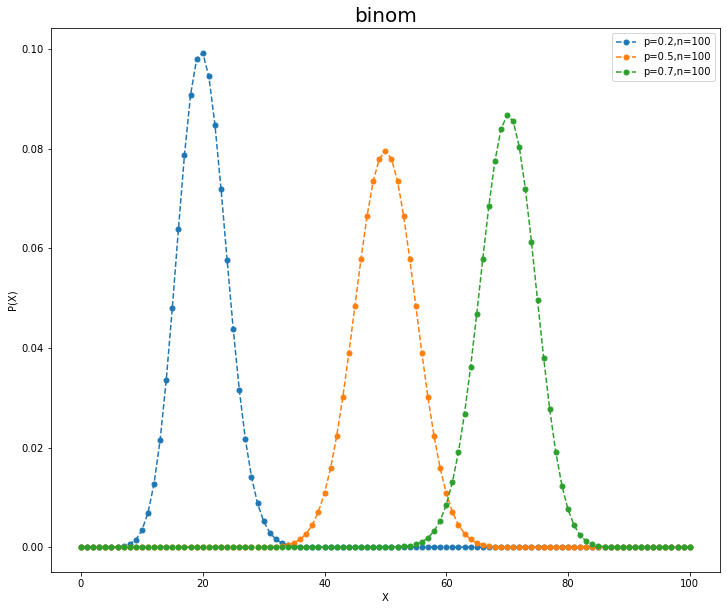

In [35]:
# 模拟试验绘制图形
Ps = [0.2, 0.5, 0.7] #p=0.2,0.5,0.7
Ns = [100, 100, 100] #n=100,n=100,n=100
colors = ['blue', 'green', 'red'] 
plt.figure(figsize=(12,10))
for p,n, c in zip(Ps, Ns, colors): # zip 多个列表
    binomDist = stats.binom(n, p)
    P_k = binomDist.pmf(np.arange(n + 1))   #arange 表示当n递增时，即.pmf(n) 验证100次发生n次 （n递增）  
    label='p={},n={}'.format(p, n)
    plt.plot(P_k, '--',marker='o', label=label,ms=5)
plt.xlabel('X')
plt.ylabel('P(X)')
plt.title(u'binom',fontsize=20,rotation=0)
plt.legend() 
plt.show()

In [37]:
P_k # array也能画图 P_k 是一个值为y的 array 他没有 index 默认间隔是1

array([5.15377521e-53, 1.20254755e-50, 1.38894242e-48, 1.05868278e-46,
       5.99038004e-45, 2.68369026e-43, 9.91474457e-42, 3.10661997e-40,
       8.42670666e-39, 2.00992559e-37, 4.26774200e-36, 8.14750745e-35,
       1.40997143e-33, 2.22703179e-32, 3.22919610e-31, 4.31994679e-30,
       5.35493404e-29, 6.17392395e-28, 6.64268484e-27, 6.68930017e-26,
       6.32138866e-25, 5.61901214e-24, 4.70805108e-23, 3.72550129e-22,
       2.78895166e-21, 1.97829638e-20, 1.33154564e-19, 8.51531656e-19,
       5.18015091e-18, 3.00091501e-17, 1.65717195e-16, 8.73133611e-16,
       4.39295348e-15, 2.11216753e-14, 9.71182914e-14, 4.27320482e-13,
       1.80028536e-12, 7.26601661e-12, 2.81080116e-11, 1.04263906e-10,
       3.71005733e-10, 1.26684885e-09, 4.15244899e-09, 1.30689480e-08,
       3.95038655e-08, 1.14707521e-07, 3.20017358e-07, 8.57918875e-07,
       2.21033266e-06, 5.47320468e-06, 1.30262271e-05, 2.97985588e-05,
       6.55186261e-05, 1.38454455e-04, 2.81182196e-04, 5.48731316e-04,
      

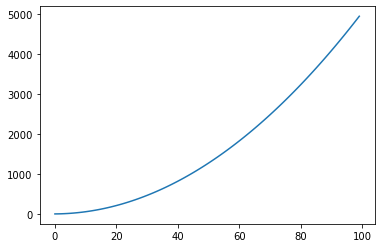

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt 


data=np.arange(100) 
data=data.cumsum()
plt.plot(data)
plt.show()

In [ ]:
3.泊松分布

泊松分布是最重要的离散分布之一，它多出现在当X表示在一定的时间或空间内出现的事件个数这种场合。
在一定时间内某交通路口所发生的事故个数，是一个典型的例子。泊松分布的概率函数为：

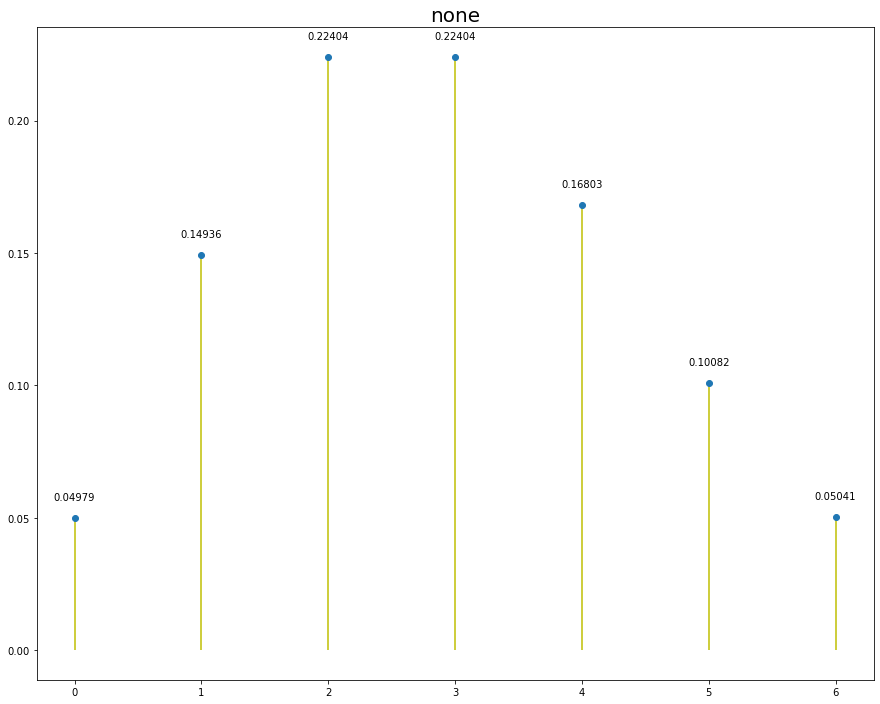

In [45]:
'''k：事件发生的次数；
λ ：给定时间范围内事件发生的平均数
PMF：p(k)=λ^k e^{-λ}/k!
期望和方差都是： λ '''
# 定义随机变量
λ=3# 已知某家店每天平均顾客为3
k=6# 求该家店铺一天顾客达到6的概率
y=stats.poisson.pmf(k,λ)
# 定义随机变量列表：0至k次
x=np.arange(0,k+1,1)
y_poiss=stats.poisson.pmf(x,λ)
# 绘图展示
f,ax=plt.subplots(figsize=(15,12))
plt.plot(x,y_poiss,marker='o',linestyle='') # linestyle='' 空 即点
plt.vlines(x,0,y_poiss,color='y')  #x轴垂直线 vline
plt.title('none',fontsize=20)#泊松分布：一天顾客达到0-6的概率分布
for i in x:
    plt.text(i,y_poiss[i]+0.006,'%.5f'%y_poiss[i],
             ha='center',va='bottom')

In [ ]:
5.正态分布

正态分布的“钟型”特征与实际中很多随机变量的“中间大，两头小”的分布规律相吻合，比如考察一群人的身高，一个班的一次考试成绩，测量误差等。
正态分布时概率论中最重要的分布，高斯(Gauss)在研究误差理论时曾用过它来刻划误差，所以，正态分布也被称为高斯分布。其概率密度函数为：


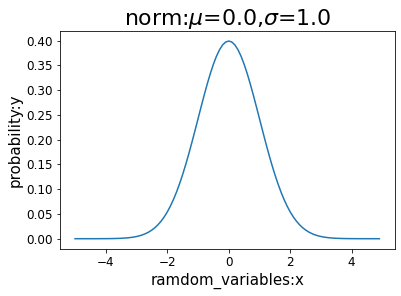

In [63]:
#定义随机变量绘制正太分布
mu=0
sigma=1
x=np.arange(-5,5,0.1)
# 定义概率密度函数PDF
y=stats.norm.pdf(x,mu,sigma)
# 画出概率密度函数y
#f,ax=plt.subplots(figsize=(10,5))
plt.plot(x,y)
#plt.vlines(0,0,y,linestyle='--',color='y')
plt.title('norm:$\mu$=%.1f,$\sigma$=%.1f'%(mu,sigma),fontsize=22)
plt.xlabel('ramdom_variables:x',fontsize=15)
plt.ylabel('probability:y',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()
